In [1]:
#DATA STRUCTURES AND ENGINEERING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#MODEL
!pip install xgboost
import xgboost as xgb

#DATA VIZ
from xgboost import plot_tree
import matplotlib.pyplot as plt
from xgboost import plot_importance

#EVALUATION 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

#MODEL SAVING
import pickle

## DATASET

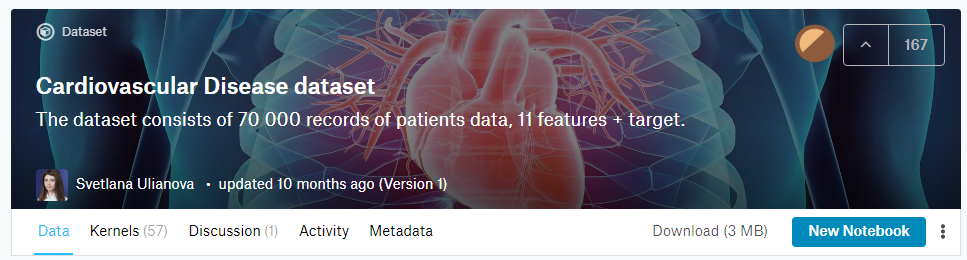

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [2]:
df = pd.read_csv("cardio_train.csv",sep=';').drop('id', axis=1)

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## FEATURES

In [4]:
y = df[['cardio']]
X = df.drop('cardio',axis=1)

## TRAIN TEST SPLIT

In [5]:
X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=42)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## MODEL

In [6]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600,
                    nthread=4, random_state=42)
xgb_model.fit(X_train, y_train)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=600, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

## DATAVIZ

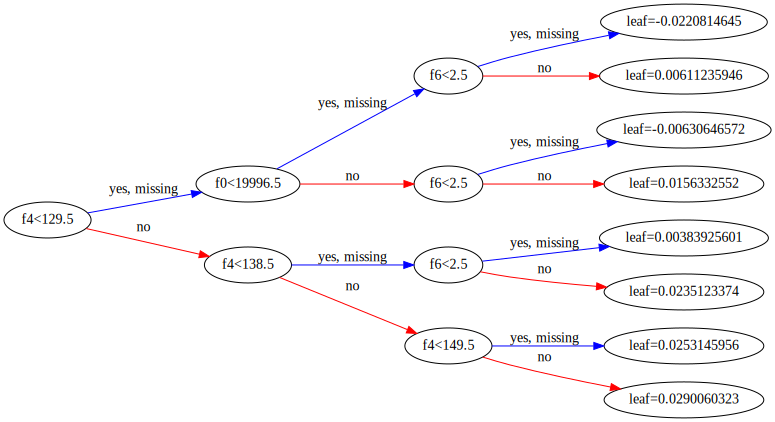

In [7]:
xgb.to_graphviz(xgb_model, rankdir='LR')

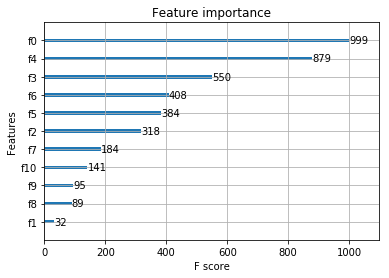

In [8]:
plot_importance(xgb_model)

In [9]:
xgb_yhat = xgb_model.predict(X_test)

# calculate the auc score
print("Roc AUC: ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1],
              average='macro'))

#confusion matrix and report
print(confusion_matrix(y_test, xgb_yhat))
print(classification_report(y_test, xgb_yhat))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Roc AUC:  0.8039077400553993
[[5405 1583]
 [2079 4933]]
             precision    recall  f1-score   support

          0       0.72      0.77      0.75      6988
          1       0.76      0.70      0.73      7012

avg / total       0.74      0.74      0.74     14000



In [10]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

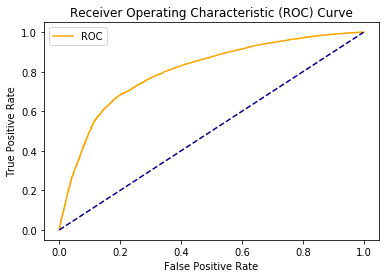

In [11]:
probs = xgb_model.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

## TEST

In [12]:
dados = np.array([[7464, 1, 166, 55, 120, 80, 1, 1, 0, 0, 0]])

print(xgb_model.predict(dados))
print(xgb_model.predict_proba(dados))

[0]
[[0.81493723 0.18506275]]


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## MODEL SAVING

In [13]:
pickle.dump(xgb_model, open("xgb_card_80auc.pkl","wb"))